In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("../databases/Brasileirao.csv",delimiter=';') #base de dados

In [3]:
df.columns #colunas que veiram na base

Index(['year', 'position', 'team', 'points', 'games', 'victories', 'draws',
       'losses', 'goals_scored', 'goals_against', 'goals_difference',
       'perc_points_won'],
      dtype='object')

In [4]:
#renomear para deixar mais fácil o uso

df = df.rename(columns={'year': 'Ano'})
df = df.rename(columns={'position': 'Posicao'})
df = df.rename(columns={'team': 'Time'})
df = df.rename(columns={'points': 'Pontos'})
df = df.rename(columns={'games': 'Jogos'})
df = df.rename(columns={'victories': 'Vitorias'})
df = df.rename(columns={'draws': 'Empates'})

df = df.rename(columns={'losses': 'Derrotas'})
df = df.rename(columns={'goals_scored': 'Gols_feitos'})
df = df.rename(columns={'goals_against': 'Gols_sofridos'})
df = df.rename(columns={'goals_difference': 'Saldo_de_gols'})
df = df.rename(columns={'perc_points_won': 'Perc_pontos_ganho'})

In [5]:
df

,Ano,Posicao,Time,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols_feitos,Gols_sofridos,Saldo_de_gols,Perc_pontos_ganho
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72
1,2003,2,Santos,87,46,25,12,9,93,60,33,63
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52
...,...,...,...,...,...,...,...,...,...,...,...,...
345,2019,16,Ceará,39,38,10,9,19,36,41,–5,34
346,2019,17,Cruzeiro,36,38,7,15,16,27,46,–19,31
347,2019,18,CSA,32,38,8,8,22,24,58,–34,28
348,2019,19,Chapecoense,32,38,7,11,20,31,52,–21,28


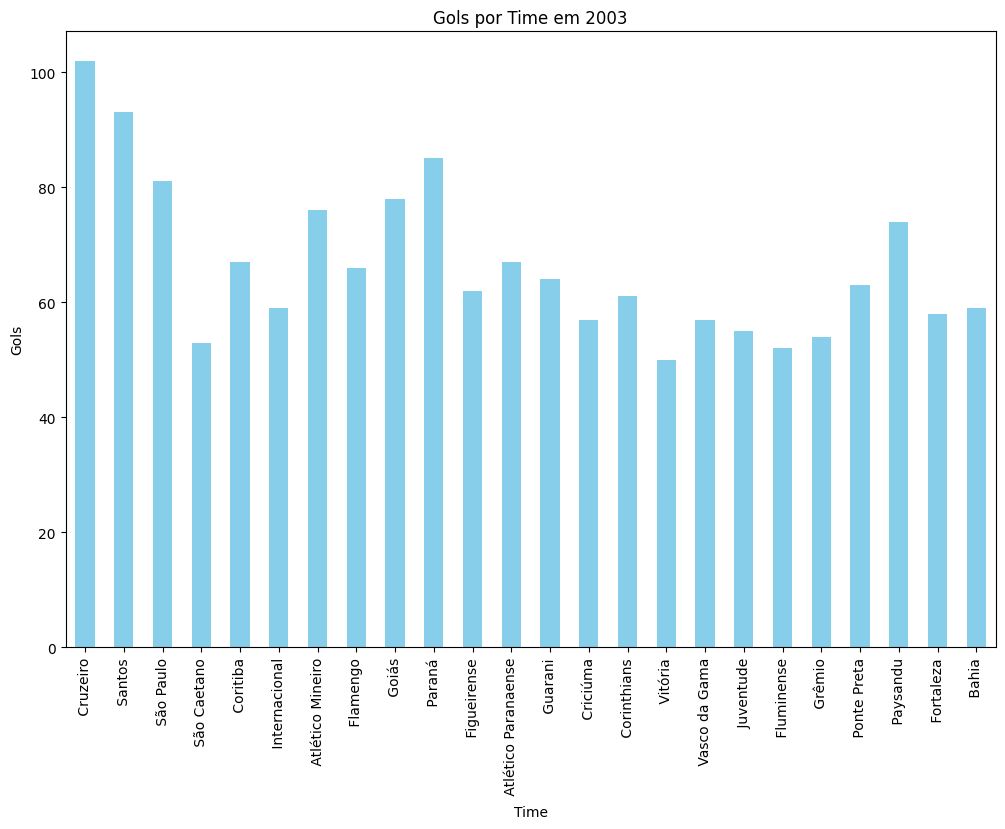

In [6]:
# Filtrar o DataFrame para o ano de 2003
df_2003 = df[df['Ano'] == 2003][['Time', 'Gols_feitos']]

# Criar um gráfico de barras
plt.figure(figsize=(12, 8))
df_2003.set_index('Time')['Gols_feitos'].plot(kind='bar', color='skyblue')
plt.title('Gols por Time em 2003')
plt.xlabel('Time')
plt.ylabel('Gols')
plt.show()


É possível perceber que a quantidade de gols feitos, não impacta a posicao do time tão fortemente, principalmente, depois do terceiro time da tabela. Ou seja, a quantidade de gols não é uma boa métrica.

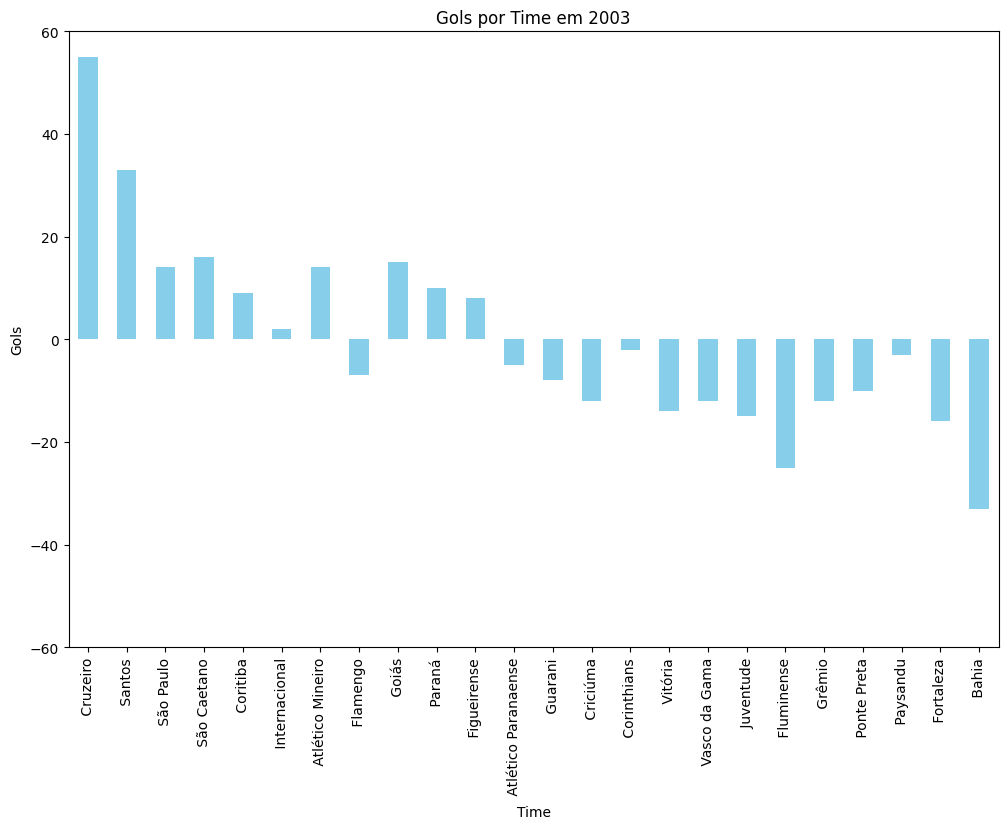

In [7]:

# Filtrar o DataFrame para o ano de 2003
df_2003_saldo = df[df['Ano'] == 2003][['Time', 'Saldo_de_gols']]
df_2003_saldo['Saldo_de_gols'] = df_2003_saldo['Saldo_de_gols'].str.replace('–', '-')
df_2003_saldo['Saldo_de_gols'] = pd.to_numeric(df_2003_saldo['Saldo_de_gols'], errors='coerce')
plt.figure(figsize=(12, 8))
df_2003_saldo.set_index('Time')['Saldo_de_gols'].plot(kind='bar', color='skyblue')
plt.title('Gols por Time em 2003')
plt.xlabel('Time')
plt.ylabel('Gols')
plt.ylim([-60,60])  # Definir limites do eixo y
plt.show()


Pelo gráfico, podemos afirmar que apesar de o saldo de gols ser relevante sim para a posição, uma vez que eles se concentram em positivos para as priemiras posições e negativos para as últimas, entre as primeiras posições, especialmente de terceiro a quinto melhores não parece ter muito impacto, uma vez que a variação entre o 3o e 11o é baixa.

In [8]:
df.loc[df['Ano']==2019]['Time'] #visualização do ano mais recente 2019

330                Flamengo
331                  Santos
332               Palmeiras
333                  Grêmio
334    Athletico Paranaense
335               São Paulo
336           Internacional
337             Corinthians
338               Fortaleza
339                   Goiás
340                   Bahia
341           Vasco da Gama
342        Atlético Mineiro
343              Fluminense
344                Botafogo
345                   Ceará
346                Cruzeiro
347                     CSA
348             Chapecoense
349                    Avaí
Name: Time, dtype: object

In [9]:
df.head() #começo da tabela

,Ano,Posicao,Time,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols_feitos,Gols_sofridos,Saldo_de_gols,Perc_pontos_ganho
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72
1,2003,2,Santos,87,46,25,12,9,93,60,33,63
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52


In [10]:
df_ganhadores = df.loc[df['Posicao']<=5] #df com os ganhadores
ganhadores_ano = df_ganhadores.groupby('Ano') #os vencedoress separados por ano
quase_ganhadores = (df[(df['Posicao'] > 5) & (df['Posicao'] < 9)]).groupby('Ano') #df com aqueles que ficaram em 6,7 e 8, dependendo dos resultados futuros pode ser que uma análise considerando esses time seja necessária ou não

In [11]:
df_ganhadores[df_ganhadores['Ano']==2004]

,Ano,Posicao,Time,Pontos,Jogos,Vitorias,Empates,Derrotas,Gols_feitos,Gols_sofridos,Saldo_de_gols,Perc_pontos_ganho
24,2004,1,Santos,89,46,27,8,11,103,58,45,64
25,2004,2,Atlético Paranaense,86,46,25,11,10,93,56,37,62
26,2004,3,São Paulo,82,46,24,10,12,78,43,35,59
27,2004,4,Palmeiras,79,46,22,13,11,72,47,25,57
28,2004,5,Corinthians,74,46,20,14,12,54,54,0,53


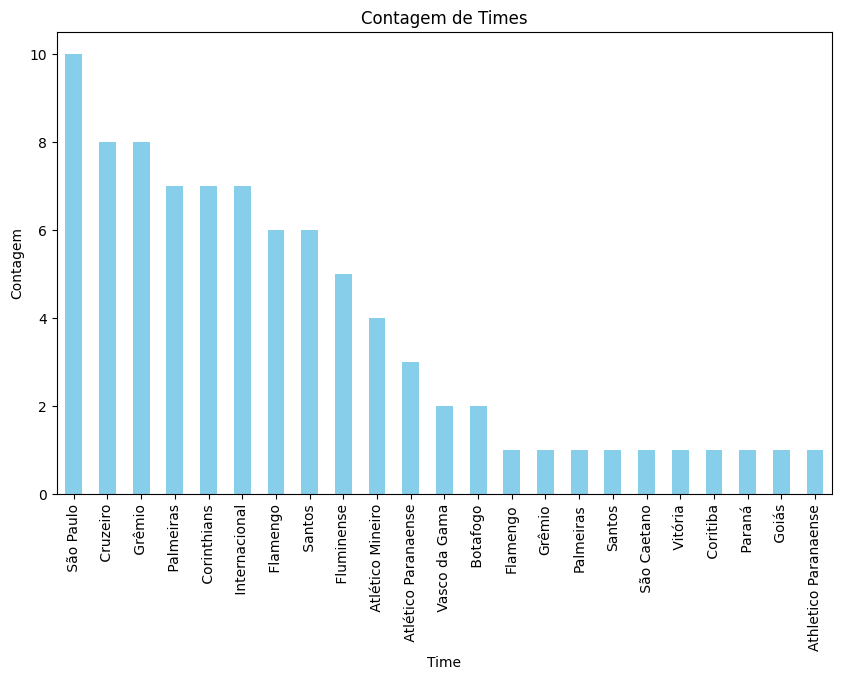

In [12]:
# Contagem de ocorrências de cada time
contagem_times = df_ganhadores['Time'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
contagem_times.plot(kind='bar', color='skyblue')
plt.title('Contagem de Times')
plt.xlabel('Time')
plt.ylabel('Contagem')
plt.show()

Percebemos que existe uma concentração em poucos times que de fato ganham o campeonato, ou seja, quem ganha costuma ganhar mais vezes. Sendo esse o nosso indicador mais sólido até agora.


In [13]:
for ano, grupo in ganhadores_ano: #visualização do groupby dos vencedores
    print(f"Ano: {ano}")
    print(grupo)
    print()

Ano: 2003
    Ano  Posicao          Time  Pontos  Jogos  Vitorias  Empates  Derrotas  \
0  2003        1      Cruzeiro     100     46        31        7         8   
1  2003        2        Santos      87     46        25       12         9   
2  2003        3     São Paulo      78     46        22       12        12   
3  2003        4   São Caetano      74     46        19       14        13   
4  2003        5      Coritiba      73     46        21       10        15   

   Gols_feitos  Gols_sofridos Saldo_de_gols  Perc_pontos_ganho  
0          102             47            55                 72  
1           93             60            33                 63  
2           81             67            14                 56  
3           53             37            16                 53  
4           67             58             9                 52  

Ano: 2004
     Ano  Posicao                  Time  Pontos  Jogos  Vitorias  Empates  \
24  2004        1                Santos    

In [14]:
for grupo in quase_ganhadores:  #visualização do groupby dos quase vencedores
    print(grupo)
    print()

(2003,     Ano  Posicao               Time  Pontos  Jogos  Vitorias  Empates  \
5  2003        6      Internacional      72     46        20       10   
6  2003        7   Atlético Mineiro      72     46        19       15   
7  2003        8           Flamengo      66     46        18       12   

   Derrotas  Gols_feitos  Gols_sofridos Saldo_de_gols  Perc_pontos_ganho  
5        16           59             57             2                 52  
6        12           76             62            14                 52  
7        16           66             73            –7                 47  )

(2004,      Ano  Posicao            Time  Pontos  Jogos  Vitorias  Empates  Derrotas  \
29  2004        6           Goiás      72     46        21        9        16   
30  2004        7       Juventude      70     46        20       10        16   
31  2004        8   Internacional      67     46        20        7        19   

    Gols_feitos  Gols_sofridos Saldo_de_gols  Perc_pontos_ganho  


In [15]:
#limpando os times, pois existia o mesmo time escrito de formas diferentes, por isso o .strip() e queremos criar um novo df em que cada linha é um time


times = df['Time'].unique()

# Remova os espaços em branco no início e no final de cada string
times_sem_espacos = [time.strip() for time in times]

# Crie um DataFrame com uma coluna 'Times'
df_times = pd.DataFrame({'Times': times_sem_espacos})

df_times = df_times.drop_duplicates(subset='Times')

df_times

,Times
0,Cruzeiro
1,Santos
2,São Paulo
3,São Caetano
4,Coritiba
5,Internacional
6,Atlético Mineiro
7,Flamengo
8,Goiás
9,Paraná


In [16]:
#queremos criar todas as coluna necessárias a atribuir por padrão zero em cada linha, indicando que aquele time não ganhou
anos = list(range(2003, 2020))

for ano in anos:
    nome_coluna = f'Top5_in_{ano}'
    df_times[nome_coluna] = 0

In [17]:
#queremos indicar os vencedores
years = list(range(2003, 2020))

for year in years:
    df_times.loc[df_times['Times'].isin(df.loc[(df['Posicao'] <= 5) & (df['Ano'] == year), 'Time'].str.strip()), f'Top5_in_{year}'] = 1

In [18]:
df_times

,Times,Top5_in_2003,Top5_in_2004,Top5_in_2005,Top5_in_2006,Top5_in_2007,Top5_in_2008,Top5_in_2009,Top5_in_2010,Top5_in_2011,Top5_in_2012,Top5_in_2013,Top5_in_2014,Top5_in_2015,Top5_in_2016,Top5_in_2017,Top5_in_2018,Top5_in_2019
0,Cruzeiro,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0
1,Santos,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1
2,São Paulo,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0
3,São Caetano,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Coritiba,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Internacional,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0
6,Atlético Mineiro,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0
7,Flamengo,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,1
8,Goiás,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Paraná,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
#primeira ideia de modelo Regressão Logística
# Queremos ver qual a acurácia dessse modelo para nosso problema e observar se faz sentido continuar nesse caminho


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Primeiro, vamos dividir os dados em conjuntos de treinamento e teste
X = df_times[['Top5_in_2003', 'Top5_in_2004', 'Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']]
y = df_times['Top5_in_2019']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agora, vamos treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Podemos usar o modelo treinado para fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# E, finalmente, podemos avaliar o desempenho do modelo comparando as previsões com os verdadeiros valores
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.8888888888888888


In [20]:
X_2019 = df_times[['Top5_in_2003', 'Top5_in_2004','Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']]
y_pred = model.predict(X_2019)

# Imprimindo as previsões
print('Previsões para 2019:', y_pred)
print('Accuracy:', accuracy_score(df_times['Top5_in_2019'], y_pred))

Previsões para 2019: [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Accuracy: 0.9545454545454546


**Como tivemos uma boa acurácia, faz sentido continuarmos explorando esse tipo de modelo, as demais razões da escolha do modelo estão no relatório**


In [21]:
#Aqui foi feito o modelo de outra forma
#com a falta da divisão entre dados de treinamento e teste:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#esse modelo corre risco de cair em um overfitting por conta disso, porém queria se observar a diferença entre os modelos

from sklearn.linear_model import LogisticRegression
import pandas as pd

X = df_times[['Top5_in_2003', 'Top5_in_2004', 'Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']]
y = df_times['Top5_in_2019']

model = LogisticRegression()
model.fit(X, y)

# Podemos usar o modelo treinado para fazer previsões para 2019
# Para isso, vamos usar os dados de 2003 até 2018 como entrada, IMPORTANTE o modelo não aceita qualquer alteração na entrada, como explicado no relatório
X_2019 = df_times[['Top5_in_2003', 'Top5_in_2004','Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']]
y_pred = model.predict(X_2019)

# Imprimindo as previsões
print('Previsões para 2019:', y_pred)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(df_times['Top5_in_2019'], y_pred))

Previsões para 2019: [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Accuracy: 0.9772727272727273


**O novo modelo conseguiu prever um time a mais o Palmeiras, concendo um aumento na acurácia, mas ainda não alcançando o 100%**

In [22]:
print(df_times['Top5_in_2019'])

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
46    1
59    0
Name: Top5_in_2019, dtype: int64


Para visualizar o código transformar de texto para código e apagar toda parte comentada, não foi feito isso para não travar a execução
Aqui foi uma tentativa de fazer previsões para 2020 com o mesmo modelo, porém um erro foi obtido e não foi possível contornar essa situação

Podemos usar o modelo treinado para fazer previsões para 2019
Para isso, vamos usar os dados de 2004 até 2019 como entrada, IMPORTANTE o modelo não aceita qualquer alteração na entrada, como explicado no relatório

X_2020 = df_times[['Top5_in_2004','Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018' , 'Top5_in_2019']]
y_pred = model.predict(X_2020)

print('Previsões para 2020:', y_pred)

In [23]:
#Foi feito um teste com 2018 para analisar o comportamento em diferentes antes, perceber se havia algum tipo de viés ou piora, porém os resultados foram positivos

from sklearn.linear_model import LogisticRegression
import pandas as pd


X = df_times[['Top5_in_2003', 'Top5_in_2004', 'Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017']]
y = df_times['Top5_in_2018']


model = LogisticRegression()
model.fit(X, y)


X_2018 = df_times[['Top5_in_2003', 'Top5_in_2004','Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017']]
y_pred = model.predict(X_2018)

print('Previsões para 2018:', y_pred)
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(df_times['Top5_in_2018'], y_pred))

Previsões para 2018: [0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Accuracy: 1.0


In [24]:
#Devido a mudança de nome do Atletico Paranaense eh preciso das seguintes alterações:

df_times.loc[df_times['Times']=='Atlético Paranaense', 'Top5_in_2019'] = 1
df_times.loc[df_times['Times']=='Athletico Paranaense', 'Top5_in_2019'] = 0

In [25]:
# Criar a lista
lista = [0] * 44
indices_1 = [7,1,24,19,11,2,4,14,22,8,23,16,6,18,25,36,0,43,40,33]
for index in indices_1:
    lista[index] = 1

In [26]:
df_times['2019_participantes'] = lista
df_times_2019 = df_times[df_times['2019_participantes']==1]
df_times_2019

,Times,Top5_in_2003,Top5_in_2004,Top5_in_2005,Top5_in_2006,Top5_in_2007,Top5_in_2008,Top5_in_2009,Top5_in_2010,Top5_in_2011,Top5_in_2012,Top5_in_2013,Top5_in_2014,Top5_in_2015,Top5_in_2016,Top5_in_2017,Top5_in_2018,Top5_in_2019,2019_participantes
0,Cruzeiro,1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,0,0,1
1,Santos,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,1
2,São Paulo,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0,1,0,1
4,Coritiba,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Atlético Mineiro,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1
7,Flamengo,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,1,1
8,Goiás,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,Atlético Paranaense,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
14,Corinthians,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1
16,Vasco da Gama,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [27]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scipy.stats as st
import numpy as np
import warnings

# Etapa 3: Treinamento do Modelo
X = df_times[['Top5_in_2003','Top5_in_2004', 'Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']]
y = df_times['Top5_in_2019']   # rótulos (2020)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Etapa 4: Previsão
# Prever os 5 melhores times de 2019
y_pred = model.predict(X_test)

# Etapa 5: Avaliação
# Avaliar o desempenho do modelo
print(classification_report(y_test, y_pred))

# Prever os 5 melhores times de 2019 entre os times que participaram
previsao_2019 = model.predict(df_times[['Top5_in_2003','Top5_in_2004', 'Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']])

# Os 5 melhores times são aqueles com as maiores probabilidades previstas
melhores_times_2019 = np.argsort(previsao_2019)[-5:]
print("Os 5 melhores times previstos para 2019 são:", melhores_times_2019)

acuracia = accuracy_score(y_test, y_pred)

from sklearn.metrics import accuracy_score
print('Accuracy:', acuracia)

# Calcule o número de previsões
n = len(y_pred)

se = st.sem(y_pred, nan_policy='omit')

# Calcule o intervalo de confiança para um nível de confiança de 95%
conf_int = st.norm.interval(confidence=0.95, loc=acuracia, scale=se)

print('O intervalo de confiança de 95% para a acurácia do modelo é (Normal):', conf_int)


# Número de iterações para o bootstrap
n_iterations = 1000

# Lista para armazenar as acurácias de cada amostra bootstrap
accuracy = []

# Executar o bootstrap
for i in range(n_iterations):
    # Gerar uma amostra bootstrap
    X_resample, y_resample = resample(X_train, y_train)

    # Verificar se ambas as classes estão presentes na amostra bootstrap
    if len(np.unique(y_resample)) < 2:
        continue

    # Ajustar o modelo na amostra bootstrap e calcular a acurácia
    model.fit(X_resample, y_resample)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

# Calcular a média das acurácias
mean_accuracy = np.mean(accuracy)

# Calcular o desvio padrão das acurácias
std_accuracy = np.std(accuracy)

# Calcular o intervalo de confiança de 95%
ci_lower = mean_accuracy - 1.96*std_accuracy
ci_upper = mean_accuracy + 1.96*std_accuracy

print(f'O intervalo de confiança de 95% para a acurácia do modelo é(Bootstrap): ({ci_lower:.2f}, {ci_upper:.2f})')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Os 5 melhores times previstos para 2019 são: [11  7 24  1 19]
Accuracy: 1.0
O intervalo de confiança de 95% para a acurácia do modelo é (Normal): (0.782226223939994, 1.217773776060006)


O intervalo de confiança de 95% para a acurácia do modelo é(Bootstrap): (0.84, 1.05)


In [28]:
#foram retirados os anos de 2003 e 2004, pois nesses anos o campeonato possuiu 24 times
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import scipy.stats as st
import numpy as np
import warnings

# Etapa 3: Treinamento do Modelo
X = df_times_2019[['Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']]
y = df_times_2019['Top5_in_2019']   # rótulos (2020)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Etapa 4: Previsão
# Prever os 5 melhores times de 2019
y_pred = model.predict(X_test)

# Etapa 5: Avaliação
# Avaliar o desempenho do modelo
print(classification_report(y_test, y_pred))

# Prever os 5 melhores times de 2019 entre os times que participaram
previsao_2019 = model.predict(df_times_2019[['Top5_in_2005', 'Top5_in_2006', 'Top5_in_2007', 'Top5_in_2008', 'Top5_in_2009', 'Top5_in_2010', 'Top5_in_2011', 'Top5_in_2012', 'Top5_in_2013', 'Top5_in_2014', 'Top5_in_2015', 'Top5_in_2016', 'Top5_in_2017', 'Top5_in_2018']])

# Os 5 melhores times são aqueles com as maiores probabilidades previstas
melhores_times_2019 = np.argsort(previsao_2019)[-5:]
print("Os 5 melhores times previstos para 2019 são:", melhores_times_2019)

acuracia = accuracy_score(y_test, y_pred)

from sklearn.metrics import accuracy_score
print('Accuracy:', acuracia)

# Calcule o número de previsões
n = len(y_pred)

se = st.sem(y_pred, nan_policy='omit')

# Calcule o intervalo de confiança para um nível de confiança de 95%
conf_int = st.norm.interval(confidence=0.95, loc=acuracia, scale=se)

print('O intervalo de confiança de 95% para a acurácia do modelo é (Normal):', conf_int)


# Número de iterações para o bootstrap
n_iterations = 1000

# Lista para armazenar as acurácias de cada amostra bootstrap
accuracy = []

# Executar o bootstrap
for i in range(n_iterations):
    # Gerar uma amostra bootstrap
    X_resample, y_resample = resample(X_train, y_train)

    # Verificar se ambas as classes estão presentes na amostra bootstrap
    if len(np.unique(y_resample)) < 2:
        continue

    # Ajustar o modelo na amostra bootstrap e calcular a acurácia
    model.fit(X_resample, y_resample)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

# Calcular a média das acurácias
mean_accuracy = np.mean(accuracy)

# Calcular o desvio padrão das acurácias
std_accuracy = np.std(accuracy)

# Calcular o intervalo de confiança de 95%
ci_lower = mean_accuracy - 1.96*std_accuracy
ci_upper = mean_accuracy + 1.96*std_accuracy

print(f'O intervalo de confiança de 95% para a acurácia do modelo é(Bootstrap): ({ci_lower:.2f}, {ci_upper:.2f})')

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

Os 5 melhores times previstos para 2019 são: [ 8 11  5 14  0]
Accuracy: 0.5
O intervalo de confiança de 95% para a acurácia do modelo é (Normal): (0.010009003864986488, 0.9899909961350135)
O intervalo de confiança de 95% para a acurácia do modelo é(Bootstrap): (0.13, 0.89)
